MNE: Coregistration after data acquisition
==========================================

Author: Hadi Zaatiti <hadi.zaatiti@nyu.edu>

In this notebook, we shall do the initial data processing of the raw data generated by an MEG experiment.
Prepare the following files to go through this notebook:
Prerequisits:
Obtained from the laser scan:

- Headscan basic surface .txt 
- Headscan points .txt
  
Obtained from the KIT-MEG machine:

- Marker measurement (x2) .mrk
- MEG recording con.

Environment:
Have MNE with all dependencies installedc
From these files we will n
.create .fif files, the base file format for MNE

In a terminal, run the following command, the following is an example on Windows CMD terminal.

In [1]:
%%cmd
mne kit2fiff

Microsoft Windows [Version 10.0.22631.3447]
(c) Microsoft Corporation. All rights reserved.

(mne-1.6.1_0) C:\Users\hz3752\PycharmProjects\meg-pipeline\docs\source\4-pipeline\notebooks>mne kit2fiff
********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************


(mne-1.6.1_0) C:\Users\hz3752\PycharmProjects\meg-pipeline\docs\source\4-pipeline\notebooks>

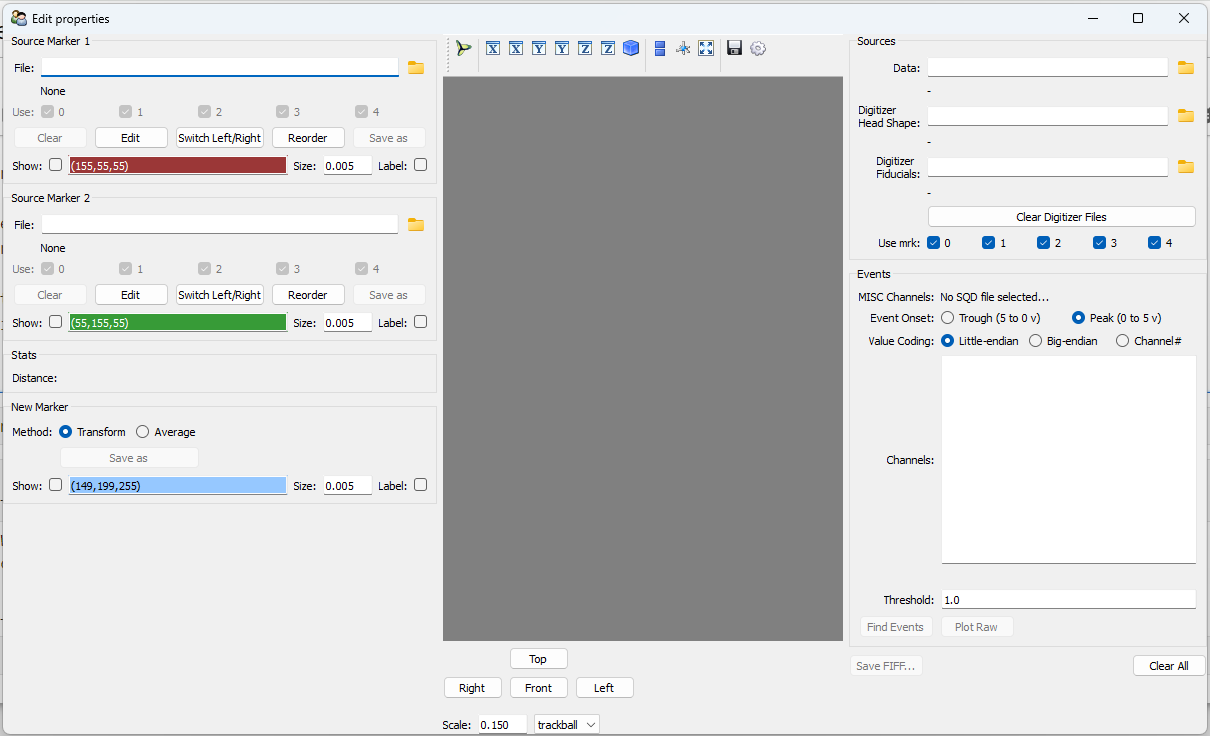

Place the two .mrk in the Source marker 1 and Source marker 2, then in Sources, place the .con in Data, the head scan .txt in Digitizer head shape and the head scan points .txt in Digitizer Fiducials 

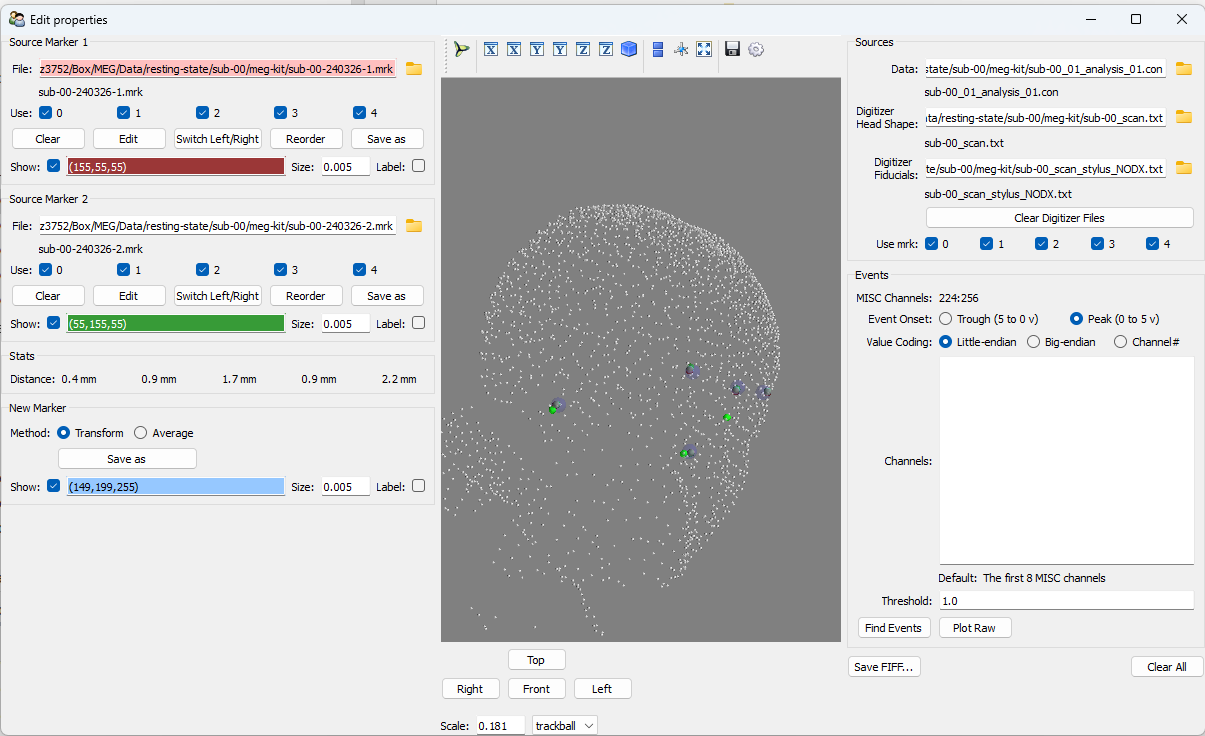
You should now see the head scan, markers and scan points.
Press the SAVE FIFF to save all the data within a .fiff.

Let us now load the .fiff within python and check its structure of the .fif

In [2]:
%matplotlib inline
import mne
import matplotlib.pyplot as plt

raw = mne.io.read_raw_fif(r'C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\meg\sub-01_01-eyes-closed-raw.fif')


raw.plot(duration = 15)
plt.show()
print(raw.info.get_channel_types())

plt.show()

Opening raw data file C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\meg\sub-01_01-eyes-closed-raw.fif...


FileNotFoundError: fname does not exist: "C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\meg\sub-01_01-eyes-closed-raw.fif"

Coregistration after KIT2FIFF
=============================

Coregistration involves aligning the MEG sensor axis, with the axis of the MRI headscan.


Different transformations can be applied during this coregistration:

- Scaling: making the head bigger or smaller to adjust to the volume of the system
- linear transformation: this involves translating the head scan to match the center of the MEG helmet
- rotation

Non-linear transformations are not used in MEG coregistration. 


You have MRI anatomical data of the participant
-----------------------------------------------

In this situation, the participant has had his head scanned in the MRI. Get the MRI ID of the participant and cross check it in the .csv file on NYU BOX, since the ID of the participants in MEG is different than the one in MRI.

T1w scans are needed and provided as input to the HPC brainsegmentation freesurfer pipeline. The MRI Lab team will provide you with the complete segmentation output folder, however this will not contain the BEM/FEM model needed for source localization.

At this point you can follow the tutorial on computing the BEM prior to proceeding. 

We are now ready to coregister the participant head scan with the MEG sensors positions.

You can run the following script to launch a mne coregistration GUI

In [ ]:
import mne
from PyQt5.QtWidgets import QApplication
import sys

app = QApplication.instance()  # checks if QApplication already exists
if not app:  # create QApplication if it doesnt exist
    app = QApplication(sys.argv)

mne.gui.coregistration(
    inst=r'C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\meg\Sub-0037\sub-01_01-eyes-closed-raw.fif',
    subject='Sub-0037',
    subjects_dir=r'C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w',  # contains a sub-folder for subject
    head_high_res=True,
)

app.exec_()

The MNE Coreg GUI is open at this point, if it is the first time you open the GUI you will get the message that there are no fiducials that have been found in the `bem` directory. In such case you will now need to set the fiducials  
There is basically three points that needs to be set: 

- the Nasion
- the LPA: the left pre-aucular 
- the RPA: the right pre-aucular

Set each one of them and then save the fiducials. A file called `sub-id-fiducials.fif` is then created in the `bem` directory
At this point you will see the digitized headscan from the laser scan, with the MRI headshape. 

Apply the Fit fiducials and then the Fit ICp algorithms to match respectivaly the HPI coils markers and headscan with the three points previously.

Perform any additional translation, rotation that can seem needed to have the best alignment. 

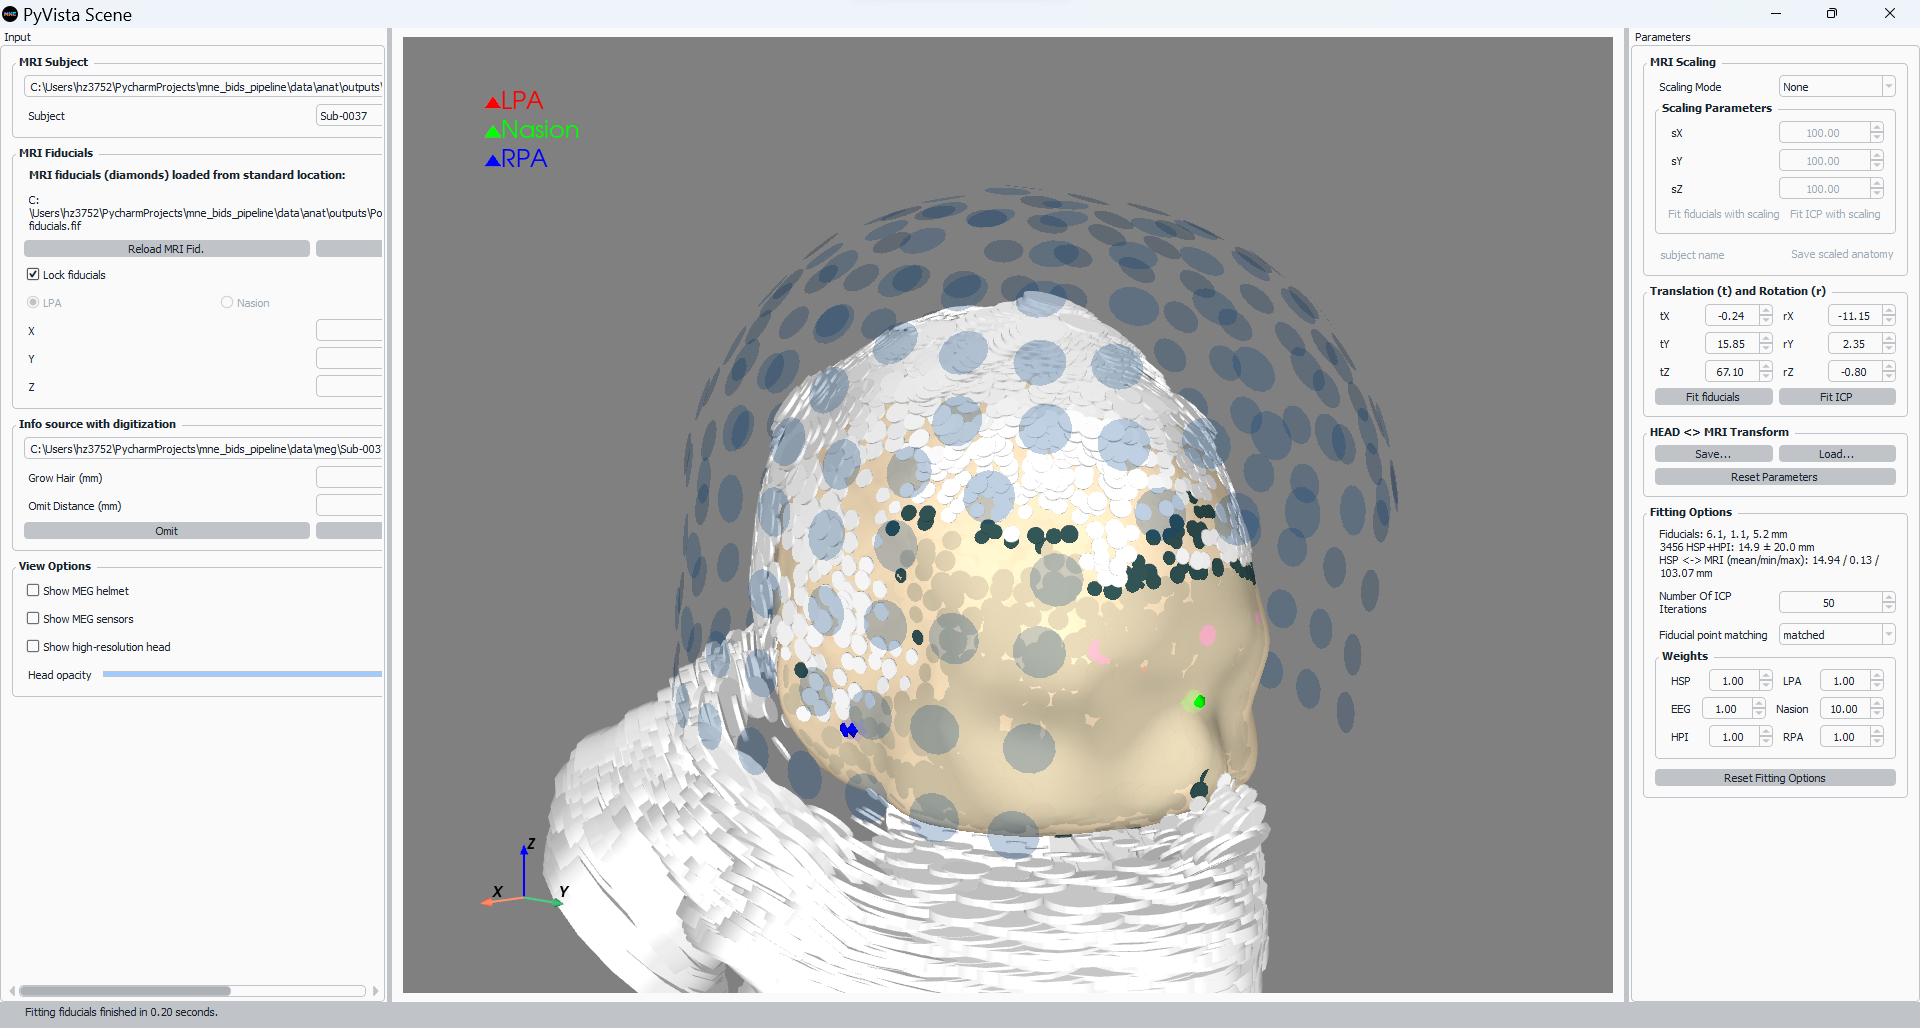

You do not have the MRI anatomical data of the participant
----------------------------------------------------------


(Add part how to use fsaverage, to match a generic headshape to the positions of the HPI coil markers)

Conclusion
----------

We now have the necesary .fif files to perform the source localization.
You can now proceed to the source localization notebook.